In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.cwd() / 'output'

      idx         label  predict_result
1809    0  5.497372e+07    1.737635e+07
916     1  1.698315e+07    1.275551e+07
0       2  9.108301e+07    9.459048e+06
2692    3  2.658824e+07    1.870202e+07
1       4  3.811762e+07    1.571826e+07
(100, 1)
(1200, 2)


,label,predict_result
0,1.330505e+08,3.648170e+07
1,5.485745e+06,4.201865e+07
2,1.366460e+08,6.240315e+07
3,9.920534e+07,3.669369e+07
4,2.514175e+05,2.225891e+06
...,...,...
1195,3.440883e+05,2.307101e+06
1196,4.304471e+05,2.330886e+06
1197,8.079944e+05,2.482519e+06
1198,2.402136e+06,2.210879e+06


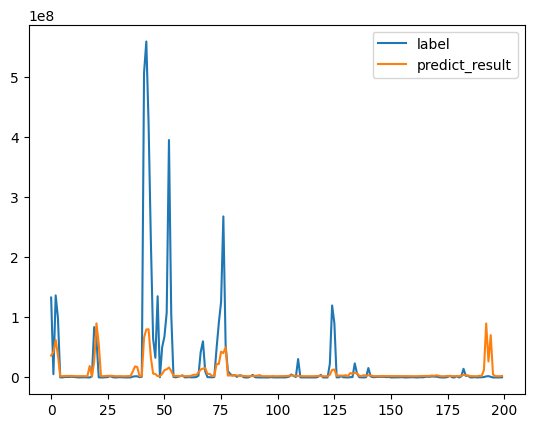

In [121]:



predict_data = pd.read_csv(
    base_dir / 'result.csv').sort_values('idx')[['idx', 'label', 'predict_result']]
print(predict_data.head())
templ_df = pd.read_csv(base_dir / 'ID_date_templ_test.csv')
templ_df['result'] = predict_data['predict_result']
templ_df = templ_df.groupby('ID').tail(3)[['ID', 'result']].groupby('ID').sum()
print(templ_df.shape)
templ_df.to_csv('output/submit.csv')

# predict_data.head(10)

predict_data_season = predict_data.groupby(predict_data.index // 3)[['label', 'predict_result']].sum()

predict_data_season[:200].plot()
# plt.plot(predict_data['idx'], predict_data[['label', 'predict_result']])
print(predict_data_season.shape)
predict_data_season

        ID        result
0  2022004  5.419806e+07
1  2022007  6.975484e+05
2  2022014  1.270591e+06
3  2022015  6.966077e+05
4  2022017  7.444896e+05
(1200, 3)


,idx,label,predict_result
587,0,1.630399e+08,3.887355e+07
300,1,7.839926e+07,4.647597e+07
0,2,1.043471e+07,3.653498e+07
891,3,1.138426e+07,5.327078e+07
1,4,1.224122e+07,3.798363e+07
...,...,...,...
585,1195,1.410620e+06,1.112259e+06
586,1196,1.305347e+06,1.045193e+06
1199,1197,2.310512e+06,1.312231e+06
298,1198,2.314063e+06,1.574864e+06


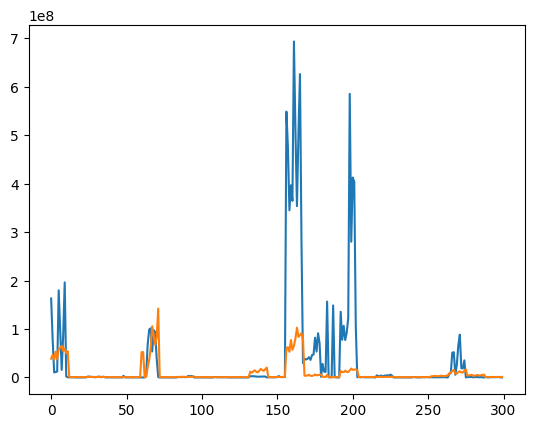

In [117]:
predict_data = pd.read_csv(base_dir / 'result.csv').sort_values('idx')[[
    'idx', 'label', 'predict_result'
]]
# print(predict_data)

templ_df = pd.read_csv(base_dir / 'ID_date_templ_test.csv')

templ_df = pd.DataFrame(templ_df['ID'].unique(), columns=['ID']).sort_values('ID')
# templ_df['result'] = predict_data['label']
templ_df['result'] = predict_data.iloc[
    11::12, :].reset_index()['predict_result']
# print(predict_data.iloc[11::12, :]['predict_result'])
# # templ_df = templ_df.groupby('ID').tail(3)[['ID', 'result']].groupby('ID').sum()
# print('1111', templ_df.shape)
print(templ_df.head())
templ_df.to_csv('output/submit.csv')

# predict_data.head(10)
# predict_data.to_csv('output/pp.csv')
predict_data_season = predict_data

# predict_data_season[:10].plot()
plt.plot(predict_data[:300]['idx'],
         predict_data[:300][['label', 'predict_result']])
print(predict_data_season.shape)
predict_data_season

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"均方误差(MSE)：{mean_squared_error(predict_data_season['label'], predict_data_season['predict_result'])}")
print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(predict_data_season['label'], predict_data_season['predict_result']))}")
print(
    f"测试集R^2：{r2_score(predict_data_season['label'], predict_data_season['predict_result'])}"
)


均方误差(MSE)：2615317195343825.0
根均方误差(RMSE)：51140172.03083917
测试集R^2：0.19289956229920158
